<a href="https://colab.research.google.com/github/FGalvao77/others-knowledge-in-python-for-data-science/blob/main/Guia_de_S%C3%A9rie_Temporal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Guia de Serie Temporal – Suavização exponencial**

``Para este exemplo, usaremos um case com os dados de Companhia Aérea``

**Mas afinal, o que é uma série temporal?**

Em estatística, econometria, matemática aplicada e processamento de sinais, uma série temporal é uma coleção de observações feitas sequencialmente ao longo do tempo. 
- Wikipédia: https://pt.wikipedia.org/wiki/S%C3%A9rie_temporal

Simplificando a definição podemos dize que uma série temporal é uma sequência de observações em intervalos de tempo regularmente espaçados.

Exemplo:
- Taxas de desemprego mensais para os últimos cinco anos;
- Produção diária em uma fábrica durante um mês;
- População em cada década de um século etc.

Uma série temporal procura padrões em sequência de intervalos, assim podemos usar a série temporal para fazer
previsões.

Exemplo de uma serie gráfica:

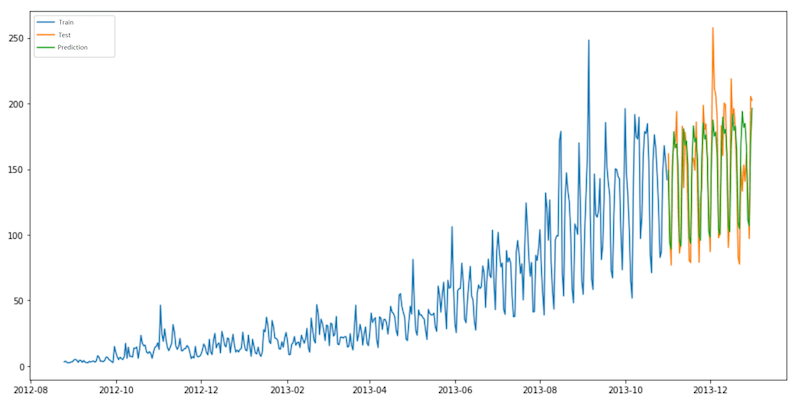

Para nossas análises iremos utilizar uma base dados disponível na Kaggle
 - https://www.kaggle.com/rakannimer/air-passengers

In [ ]:
# importando as bibliotecas
import pandas as pd               # biblioteca para modelagem de dados
import numpy as np                # biblioteca para recursos matemáticos

# bibliotecas para plotagem de dados
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style()
%matplotlib inline

In [ ]:
# biblioteca/função para ignorar avisos
from warnings import filterwarnings

In [ ]:
# realizando o carregamento do conjunto de dados para google colab
from google.colab import files  # biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving AirPassengers.csv to AirPassengers.csv


In [ ]:
# instanciando a base de dados
air_passengers = pd.read_csv('AirPassengers.csv')

In [ ]:
# visualizando as 10 primeiras linhas
air_passengers.head(10)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [ ]:
# formatando a coluna "Month" para o formato "Date"
air_passengers['Month'] = pd.to_datetime(
    air_passengers['Month'],
    infer_datetime_format=True
)

In [ ]:
# incluindo o "Month" como index
df = air_passengers.set_index(['Month'])

In [ ]:
# verificando as 5 primeiras linhas
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
# verificando as colunas
for coluna in df.columns:
  print(coluna)

#Passengers


In [ ]:
# verificando a dimensão da base de dados
df.shape

(144, 1)

In [ ]:
# iformações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


**Dicionário de dados estatísticos**

  - ``count``: total de registros;
  - ``mean``: média;
  - ``std``: desvio padrão;
  - ``min``: valor mínimo;
  - ``25%``: 1º quartil;
  - ``50%``: mediana;
  - ``75%``: 3º quartil;
  - ``max``: valor máximo

In [ ]:
# visualizando dados estatísticos
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


**Agora iremos plotar gráficos**

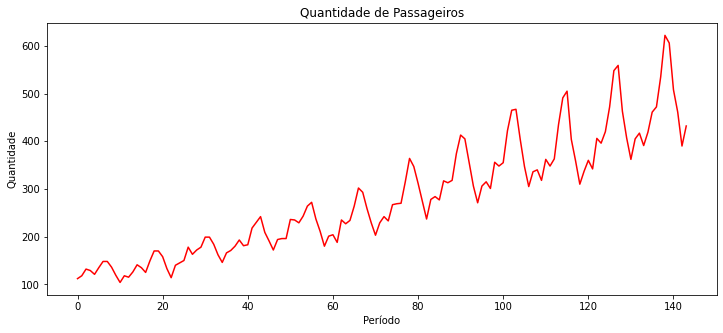

In [ ]:
# instanciando o eixo da gráfico
eixo_1 = df['#Passengers'].values

# configurando o gráfico e exibindo-o
plt.figure(figsize=(12,5))
plt.title('Quantidade de Passageiros')
plt.xlabel('Período')
plt.ylabel('Quantidade')
plt.plot(eixo_1, color='red');

**Treinar o modelo da ``série temporal``**

In [ ]:
# importando a biblioteca
from statsmodels.tsa.api import ExponentialSmoothing

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# definindo a função da série
func_serie = ExponentialSmoothing(
    df,
    seasonal_periods=12,
    trend='additive',
    seasonal='additive').fit(use_boxcox=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Caso não tenha conhecimento sobre essa tema, vou deixar um artigo bem legal de como funciona uma serie temporal
- https://towardsdatascience.com/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788

In [ ]:
# instanciando os dias para serem previstos
qtde_dias_prever = 30

In [ ]:
# realizando a previsão usando o método "forecast"
previsao = func_serie.forecast(qtde_dias_prever)
previsao.head()

1961-01-01    450.313926
1961-02-01    425.815709
1961-03-01    476.205684
1961-04-01    506.214583
1961-05-01    519.318771
Freq: MS, dtype: float64

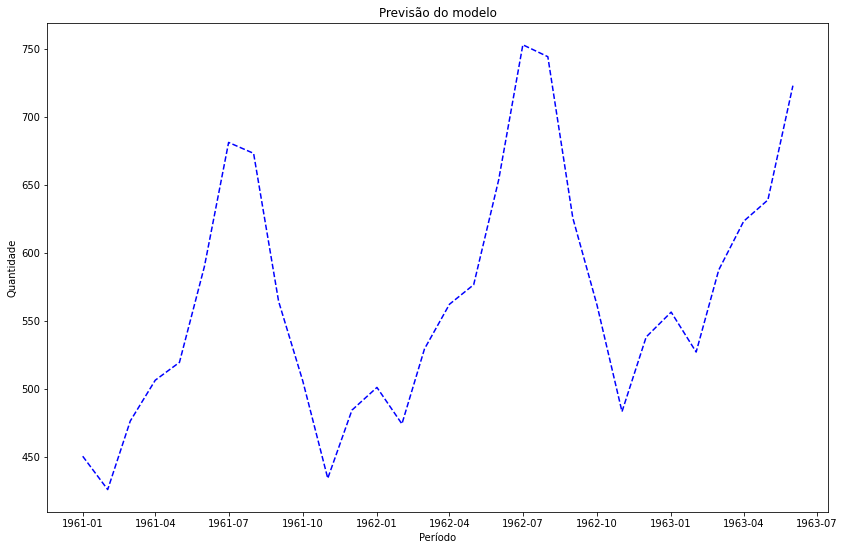

In [ ]:
# configurando o gráfico e exibindo-o
plt.figure(figsize=(14,9))
plt.title('Previsão do modelo')
plt.xlabel('Período')
plt.ylabel('Quantidade')
plt.plot(previsao, color='blue',
         linestyle='--');

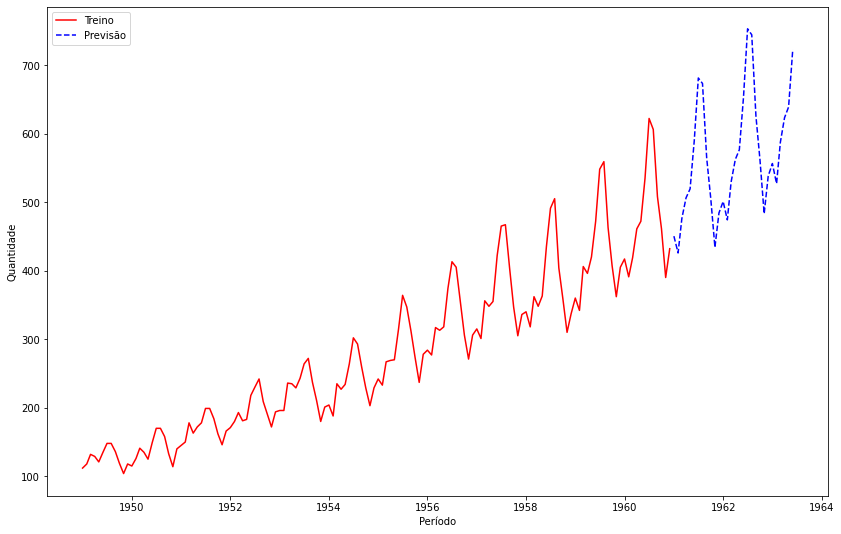

In [ ]:
# formatando o gráfico com a previsão e treino
plt.figure(figsize=(14,9))
plt.plot(df['#Passengers'], label='Treino', color='red')
plt.plot(previsao, label='Previsão', color='blue', linestyle='--')
plt.xlabel('Período')
plt.ylabel('Quantidade')
plt.legend(loc=0);

**Agora iremos verificar os ``diagramas de autocorrelação``**

- iremos exibir o diagrama de autocorrelação e o diagrama de autocorrelação parcial


In [ ]:
# importando a biblioteca para gerar as correlações
import statsmodels.tsa.api as smt

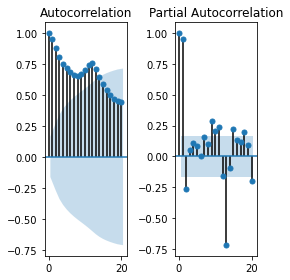

In [ ]:
# definindo a figura de 1 linha e 2 colunas 
fig, axes = plt.subplots(1,2)

# fixando o tamanho dos gráficos
fig.set_figwidth(12)
fig.set_figwidth(4)

# plotando o gráfico de auticorrelação
smt.graphics.plot_acf(df, lags=20, ax=axes[0])

# plotando o gráfico de autocorrelação parcial
smt.graphics.plot_pacf(df, lags=20, ax=axes[1])
plt.tight_layout();

**Conclusão**

Nossa serie teve uma performance muito boa, devido os dados terem um
padrão sequencial (Tendência).

Mas ressalto que nem sempre será assim!


**Final**

Esse guia sobre como usar uma serie temporal no Python.

Guia da documentação caso queira mais detalhes
 - https://www.statsmodels.org/stable/examples/notebooks/generated/exponential_smoothing.html

